## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

This is a snapshot of a dataset created by Yasir Hussein Shakir on The chronic disease indicators (CDI) data. The dataset includes YearStart, YearEd, LoccatioAbbr,  LoccatioDesc, Datasource, Toic, Questio, Resos, datavaluetye,and datavalueuit.

Dataset description & download https://www.kaggle.com/datasets/yasserhessein/chronic-disease-indicators-cdi-csv

**1.1 Importing Library**

pandas digunakan untuk manipulasi tabular data dan numpy digunakan untuk manipulasi angka atau numerikal data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

In [5]:
!gdown 1zoSTsP1n8PmYOwJuQ-13mfgHeko0fM3F

Downloading...
From: https://drive.google.com/uc?id=1zoSTsP1n8PmYOwJuQ-13mfgHeko0fM3F
To: /content/U.S._Chronic_Disease_Indicators__CDI_.csv
100% 359M/359M [00:01<00:00, 237MB/s]


import data menggunakan fungsi dari Library Pandas.
Pandas digunakan untuk memproses data, mulai pembersihan data, manipulasi data, hingga melakukan analisis data.

In [6]:
import pandas as pd
dataset = pd.read_csv('/content/U.S._Chronic_Disease_Indicators__CDI_.csv')
dataset

<ipython-input-6-a1dd4c4a48ed>:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/U.S._Chronic_Disease_Indicators__CDI_.csv')


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2014,2014,AR,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,5,AST,AST3_1,NMBR,GENDER,GENM,NaN,NaN,NaN,NaN
1,2018,2018,CO,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,8,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,DC,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,11,AST,AST3_1,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2017,2017,GA,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,13,AST,AST3_1,NMBR,GENDER,GENF,NaN,NaN,NaN,NaN
4,2010,2010,MI,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,NaN,NaN,Number,...,26,AST,AST3_1,NMBR,RACE,HIS,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185671,2020,2020,WY,Wyoming,BRFSS,Diabetes,Dilated eye examination among adults aged >= 1...,NaN,%,Age-adjusted Prevalence,...,56,DIA,DIA7_0,AGEADJPREV,RACE,WHT,NaN,NaN,NaN,NaN
1185672,2020,2020,WY,Wyoming,BRFSS,Older Adults,Proportion of older adults aged >= 65 years wh...,NaN,%,Crude Prevalence,...,56,OLD,OLD3_1,CRDPREV,RACE,WHT,NaN,NaN,NaN,NaN
1185673,2017,2017,IA,Iowa,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,NaN,%,Age-adjusted Prevalence,...,19,ART,ART2_1,AGEADJPREV,RACE,HIS,NaN,NaN,NaN,NaN
1185674,2020,2020,WY,Wyoming,BRFSS,Diabetes,Diabetes prevalence among women aged 18-44 years,NaN,%,Crude Prevalence,...,56,DIA,DIA2_2,CRDPREV,RACE,HIS,NaN,NaN,NaN,NaN


## 2. Exploratory Data

untuk mengetahui ukuran dataset digunakan funtion shape untuk mencari tahu panjang atau berapa banyak data poin dan picture yang ada pada data tersebut

In [7]:
dataset.shape

(1185676, 34)

dataset.columns digunakan untuk menampilkan nama-nama kolom data tersebut

In [8]:
dataset.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

untuk mengetahui tipe data dari masing-masing kolom apakah data tersebut string, numerikal data, atau yang lainnya digunakan funtion dataset.dtypes


In [9]:
dataset.dtypes

YearStart                      int64
YearEnd                        int64
LocationAbbr                  object
LocationDesc                  object
DataSource                    object
Topic                         object
Question                      object
Response                     float64
DataValueUnit                 object
DataValueType                 object
DataValue                     object
DataValueAlt                 float64
DataValueFootnoteSymbol       object
DatavalueFootnote             object
LowConfidenceLimit           float64
HighConfidenceLimit          float64
StratificationCategory1       object
Stratification1               object
StratificationCategory2      float64
Stratification2              float64
StratificationCategory3      float64
Stratification3              float64
GeoLocation                   object
ResponseID                   float64
LocationID                     int64
TopicID                       object
QuestionID                    object
D

untuk mengetahui apakah dataset yang digunakan terdapat missing value atau tidak digunakan funtion dataset.info seperti berikut

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185676 entries, 0 to 1185675
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YearStart                  1185676 non-null  int64  
 1   YearEnd                    1185676 non-null  int64  
 2   LocationAbbr               1185676 non-null  object 
 3   LocationDesc               1185676 non-null  object 
 4   DataSource                 1185676 non-null  object 
 5   Topic                      1185676 non-null  object 
 6   Question                   1185676 non-null  object 
 7   Response                   0 non-null        float64
 8   DataValueUnit              1033553 non-null  object 
 9   DataValueType              1185676 non-null  object 
 10  DataValue                  806942 non-null   object 
 11  DataValueAlt               804578 non-null   float64
 12  DataValueFootnoteSymbol    393710 non-null   object 
 13  DatavalueFoo

untuk mengetahui ada uniq value apa saja yang terdapat pada data dapat menggunakan funtion dataset.nunique. uniq value digunakan untuk mengecek picture mana yang akan digunakan sebagai label atau 

In [11]:
dataset.nunique()

YearStart                       16
YearEnd                         16
LocationAbbr                    55
LocationDesc                    55
DataSource                      31
Topic                           17
Question                       203
Response                         0
DataValueUnit                   12
DataValueType                   19
DataValue                    50436
DataValueAlt                 41213
DataValueFootnoteSymbol         17
DatavalueFootnote               18
LowConfidenceLimit           22464
HighConfidenceLimit          24000
StratificationCategory1          3
Stratification1                 11
StratificationCategory2          0
Stratification2                  0
StratificationCategory3          0
Stratification3                  0
GeoLocation                     54
ResponseID                       0
LocationID                      55
TopicID                         17
QuestionID                     203
DataValueTypeID                 19
StratificationCatego

**2.1 Handling Missing Value**

setelah mengetahui terdapat missing value pada data yang akan dianalisis selanjutnya yaitu menghilangkan missing value tersebut dengan cara pertama mencari tahu jumlah data yang terdapat missing value tersebut, adapun funtion yang digunakan yaitu dataset.isnul().sum()

In [12]:
dataset.isnull().sum()

YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
DataSource                         0
Topic                              0
Question                           0
Response                     1185676
DataValueUnit                 152123
DataValueType                      0
DataValue                     378734
DataValueAlt                  381098
DataValueFootnoteSymbol       791966
DatavalueFootnote             791966
LowConfidenceLimit            503296
HighConfidenceLimit           503296
StratificationCategory1            0
Stratification1                    0
StratificationCategory2      1185676
Stratification2              1185676
StratificationCategory3      1185676
Stratification3              1185676
GeoLocation                    10166
ResponseID                   1185676
LocationID                         0
TopicID                            0
QuestionID                         0
D

setelah mengetahui data yang terdapat missing value, selanjutnya memeriksa data yang terdapat missing value tersebut apakah bersipat numerical data atau bersipat string

In [13]:
dataset['Response'].dtypes

dtype('float64')

In [14]:
dataset['DataValueUnit'].dtypes

dtype('O')

In [15]:
dataset['DataValue'].dtypes

dtype('O')

In [16]:
dataset['DataValueAlt'].dtypes

dtype('float64')

In [17]:
dataset['DataValueFootnoteSymbol'].dtypes

dtype('O')

In [18]:
dataset['DatavalueFootnote'].dtypes

dtype('O')

In [19]:
dataset['LowConfidenceLimit'].dtypes

dtype('float64')

In [20]:
dataset['HighConfidenceLimit'].dtypes

dtype('float64')

In [21]:
dataset['StratificationCategory2'].dtypes

dtype('float64')

In [22]:
dataset['Stratification2'].dtypes

dtype('float64')

In [23]:
dataset['StratificationCategory3'].dtypes

dtype('float64')

In [24]:
dataset['Stratification3'].dtypes

dtype('float64')

In [25]:
dataset['GeoLocation'].dtypes

dtype('O')

In [26]:
dataset['ResponseID'].dtypes

dtype('float64')

In [27]:
dataset['StratificationCategoryID2'].dtypes

dtype('float64')

In [28]:
dataset['StratificationID2'].dtypes

dtype('float64')

In [29]:
dataset['StratificationCategoryID3'].dtypes

dtype('float64')

In [30]:
dataset['StratificationID3'].dtypes

dtype('float64')

karena dari 18 data yang terdapat missing value 13 diantaranya merupakan numerical data, maka data kita dapat mengisi data tersebut baik menggunakan mean, median, standar deviasi, nol dan sebagainya. sedangkan untuk data yang bertipe string cukup di drop saja.
adapun strategi yang saya gunakan disini yaitu menggunakan mean, yaitu mengisi rata-rata dari data poin. 

In [31]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [32]:
imputer = imputer.fit(dataset[['Response', 'DataValueAlt', 'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']])
imputer

SimpleImputer()

In [ ]:
dataset[['Response', 'DataValueAlt', 'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']] = imputer.transform(dataset[['Response', 'DataValueAlt', 'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3', 'ResponseID', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3']])
dataset.isnull().sum()

Using drop column tohandle missing value on categorical or object data

In [33]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
DataSource                   0
Topic                        0
Question                     0
DataValueType                0
StratificationCategory1      0
Stratification1              0
LocationID                   0
TopicID                      0
QuestionID                   0
DataValueTypeID              0
StratificationCategoryID1    0
StratificationID1            0
dtype: int64

## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

secara umum dapat diketahui bahwa outliers merupakan data yang jaraknya cukup jauh dari kumpulan data poin.

untuk melihat outliers yang sifatnya numerical data yang terdapat pada dataset yang dianalisis digunakan function describe 

In [34]:
dataset.describe()

,YearStart,YearEnd,LocationID
count,1.185676e+06,1.185676e+06,1.185676e+06
mean,2.015103e+03,2.015643e+03,3.078907e+01
std,3.320259e+00,3.001197e+00,1.750972e+01
min,2.001000e+03,2.001000e+03,1.000000e+00
25%,2.013000e+03,2.013000e+03,1.700000e+01
50%,2.015000e+03,2.016000e+03,3.000000e+01
75%,2.018000e+03,2.018000e+03,4.500000e+01
max,2.021000e+03,2.021000e+03,7.800000e+01


karena pada describe hanya menampilkan data jadi cukup sulit untuk melihat data apa saja yang termasuk kedalam outliers, oleh karena itu dilakukan visualisasi data. dengan menggunakan visualisasi data akan tergambar apa itu outliers dan dimana saja letak dari outliers tersebut. Adapun funtion yang digunakan untuk melakukan visualisasi data disini menggunakan matplotlib.

<Axes: >

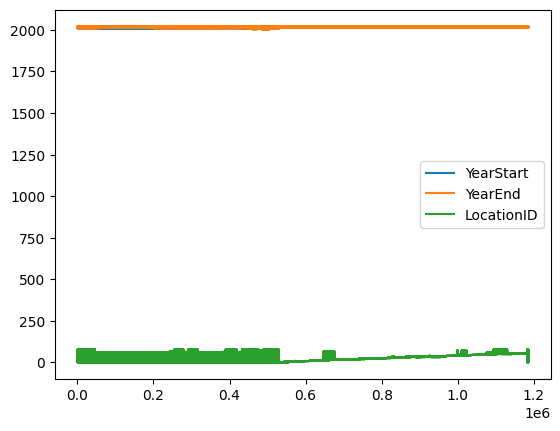

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

pada grafik diatas dapat dilihat ada 2 data yang letak nya cukup jauh dan posisinya tumpang tindih yaitu YearStart dan YearEnd. kemungkianan terdapat outliers dari kedua data tersebut karena jarak nya cukup jauh. 

meskipun dengan melihat grafik tersebut kita dapat mengetahui data mana saja yang terdapat outliers akan tetapi itu belum cukup akurat, oleh karena itu dapat menggunakan cara lain yaitu dengan boxplot dari library seaborn

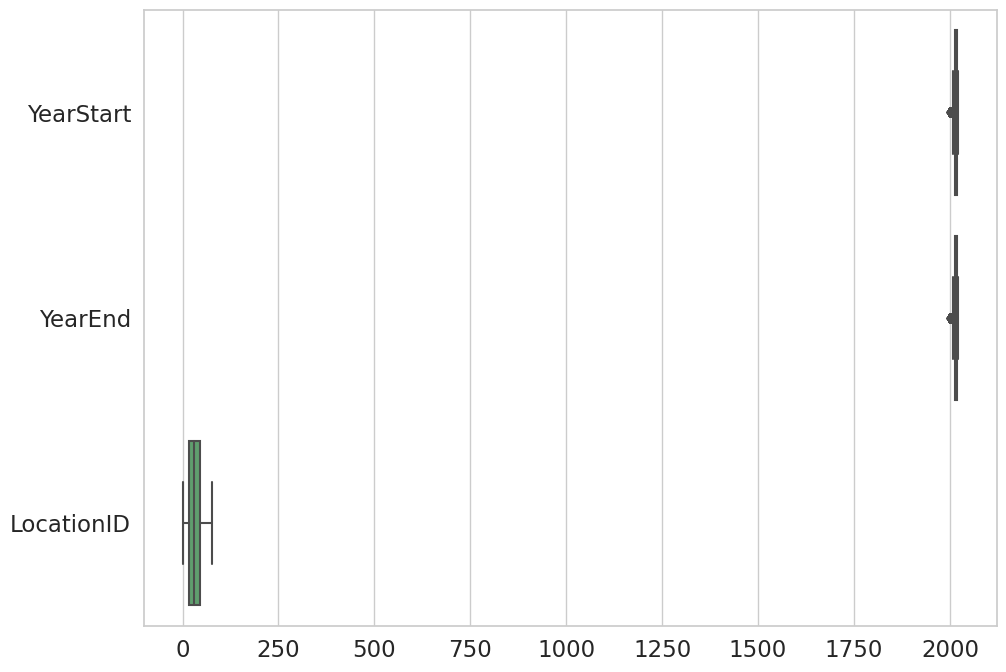

In [36]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

dari gambar diatas dapat dilihat bahwa terdapat data yang cukup jauh yaitu YearStart dan YearEnd. setelah menampilkan grafik untuk melihat data apa saja yang keluar dari outliers, diketahui bahwa dua data yang terdapat outliers yaitu YearStart dan YearEnd. untuk mengetahui pola dari YearStart dan YearEnd digunakan funtion scatter plot

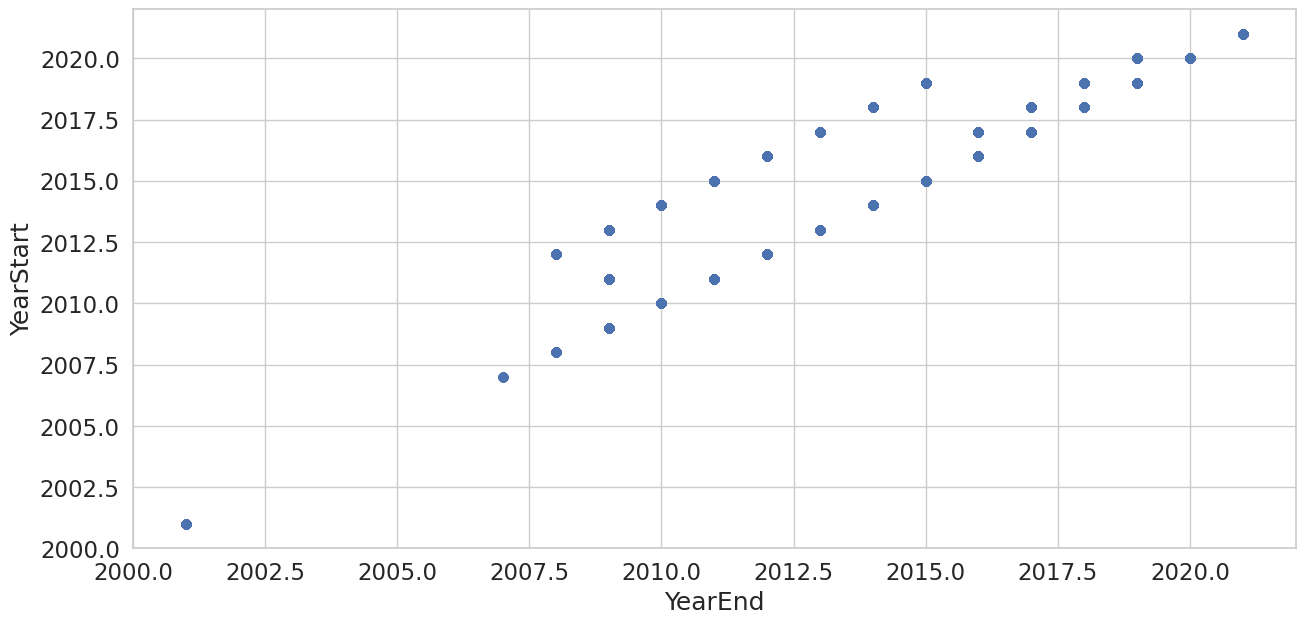

In [37]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['YearStart'], dataset['YearEnd'])
 
# x-axis label
ax.set_xlabel('YearEnd')
 
# y-axis label
ax.set_ylabel('YearStart')
plt.show()

setelah mengetahui data yang terdapat outliers selanjutnya yaitu dibersihkan data yang terdapat ouliers tersebut, metode yang digunakan disini yaitu dengan **IQR (Inter Quartile Range)**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

In [38]:
import sklearn

# IQR YearStart
Q1 = np.percentile(dataset['YearStart'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['YearStart'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (1185676, 16)


In [39]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['YearStart'] > upper].index
outliers_lower = dataset[dataset['YearStart'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (1185572, 16)


<ipython-input-39-d1e1e324b93d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers, inplace=True)


sebelum menghilangkan outliers = (1185676, 15).
setelah menghilangkan outliers = (1185572, 15)

In [40]:
import sklearn

# IQR YearEnd
Q1 = np.percentile(dataset['YearEnd'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['YearEnd'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (1185572, 16)


In [41]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['YearEnd'] > upper].index
outliers_lower = dataset[dataset['YearEnd'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (1185572, 16)


<ipython-input-41-3c55abcc98b1>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(outliers, inplace=True)


setelah menghilangkan outliers maka lihat kembali apakah masih terdapat outliers atau tidak dengan menggunakan boxplot dan scatter plot, kenapa menggunakan dua funtion tersebut karena tampilannya yang jelas, mudah dibaca dan dipahami.

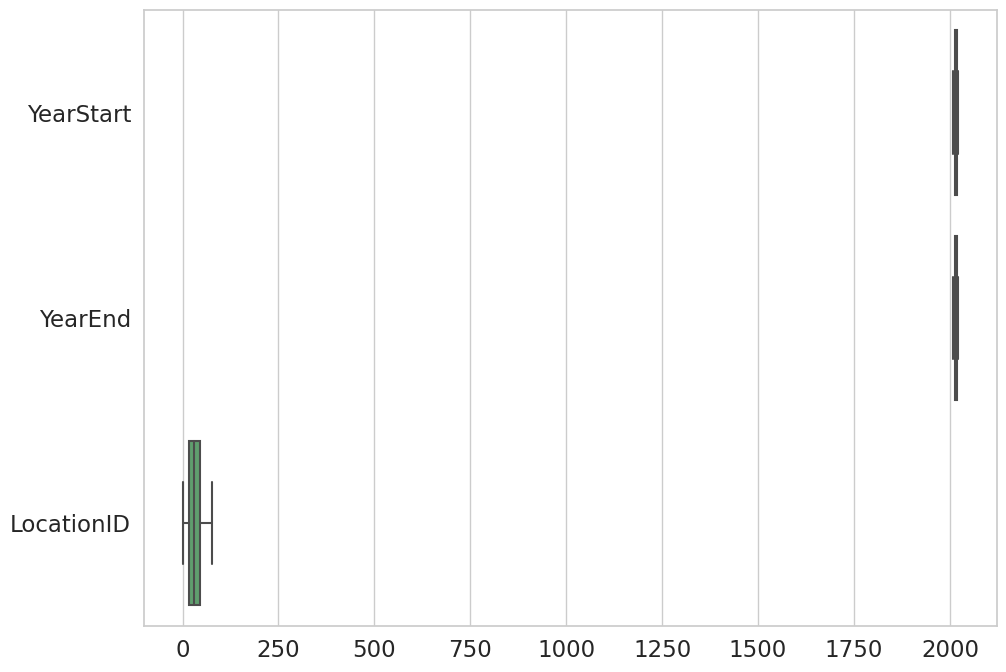

In [42]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

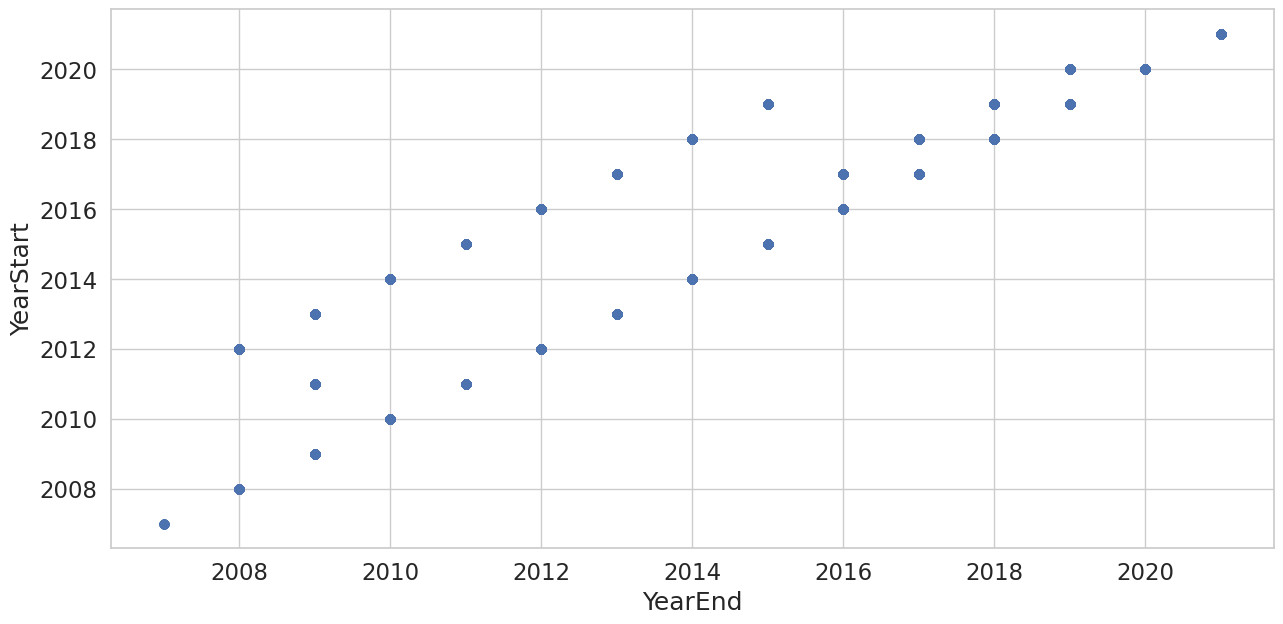

In [43]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['YearStart'], dataset['YearEnd'])
 
# x-axis label
ax.set_xlabel('YearEnd')
 
# y-axis label
ax.set_ylabel('YearStart')
plt.show()

Show data distribution based on density (kde - kernel density estimation)


dari grafik dibawah ini dapat diketahui bahwa, Density pada YearStart terdapat kerapatan pada tahun 2008 hingga 2020 atau data berkumpul pada tahun 2008 hingga 2020. untuk LocationID dapat diketahui kerapatan nya yaitu berada pada 0 hingga 75. dan untuuk YearEnd terdapat kerapatan pada tahun 2010 hingga 2020

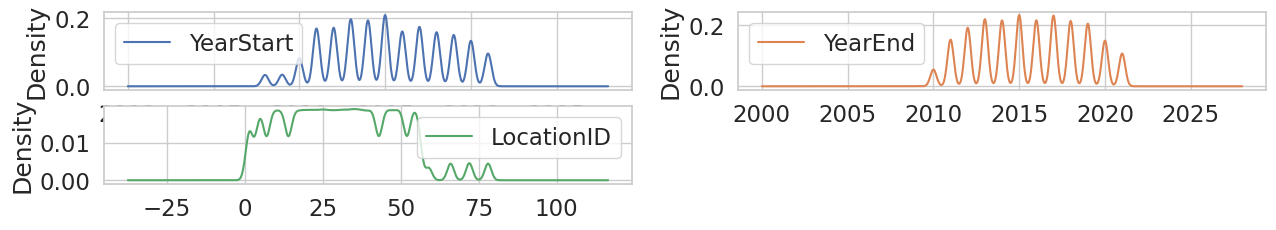

In [44]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Show data distribution based on histogram

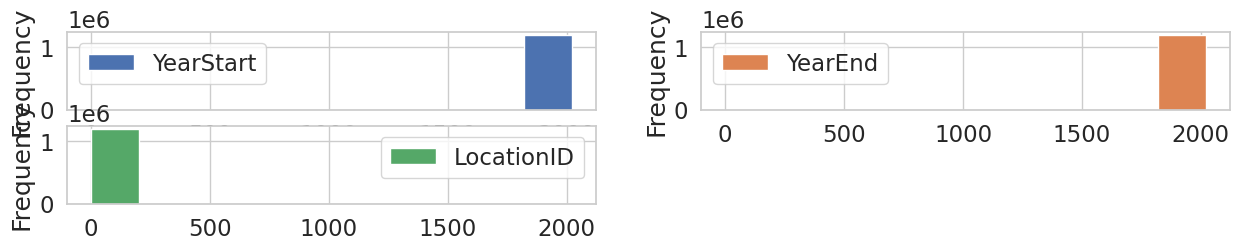

In [45]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

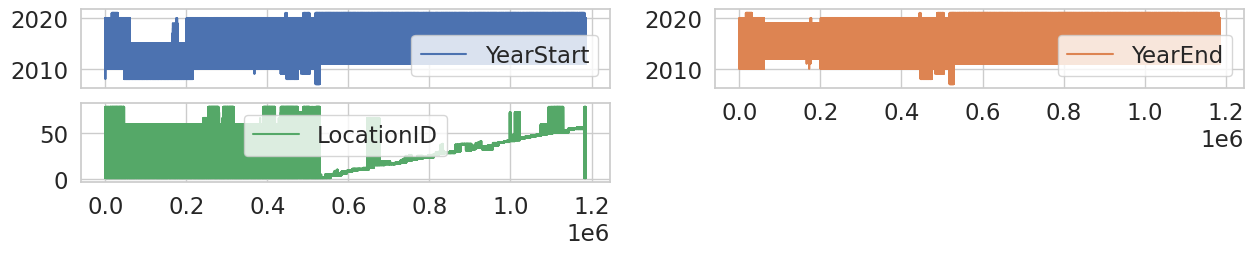

In [46]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

correlation matrix disini ditampilkan menggunaka scatter plot, seperti berikut

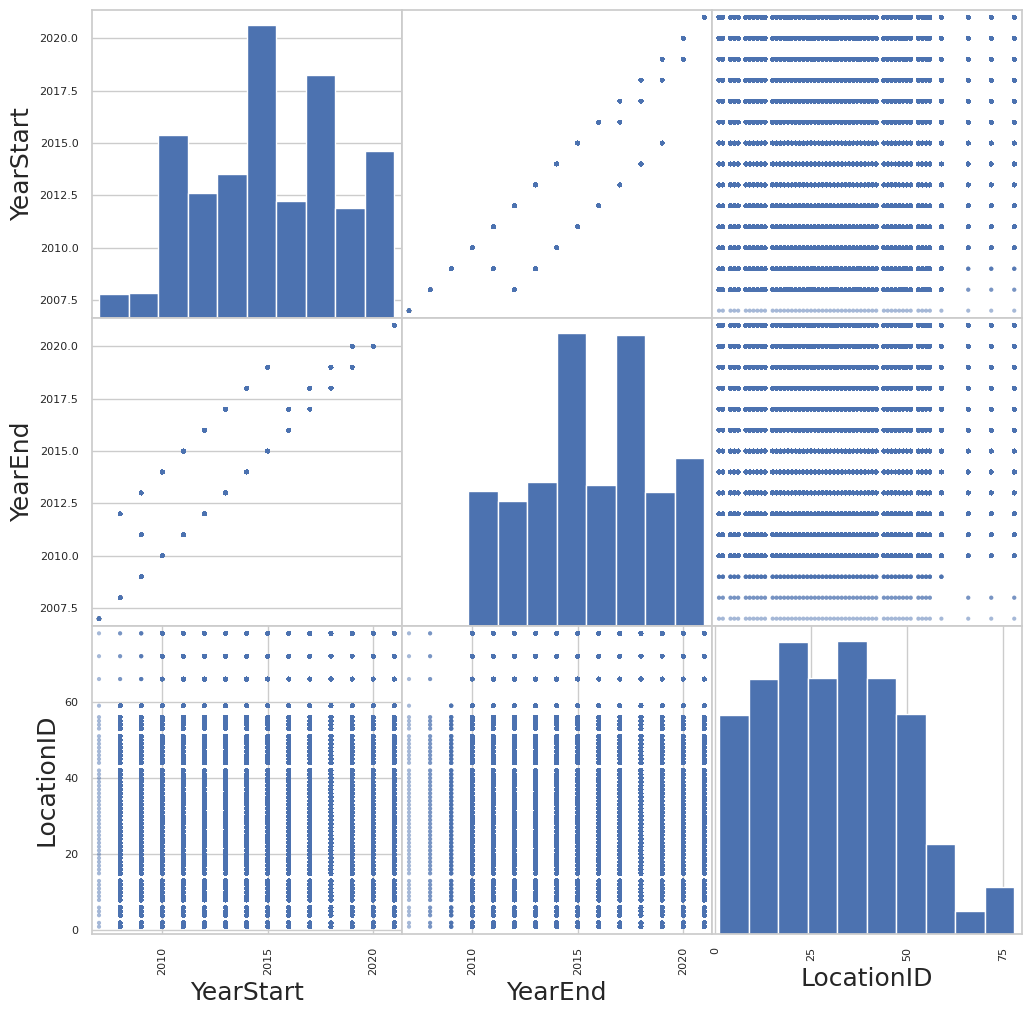

In [47]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

dari scatter plot diatas kita dapat melihat perbandingan anatar kolom satu dengan yang lainnya. pada grafik tersebut ditampilkan diagram batang atau hitogram hal tersebut karena membandingkan antara masing-masing kolom sepert kolom A dengan kolom A, kolom B dengan kolom B begitupun seterusnya. karena dengan scatter plot terasa cukup sulit untuk membacanya, untuk memastikan digunakan heatmap

correlation matrix with heatmap

<ipython-input-48-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


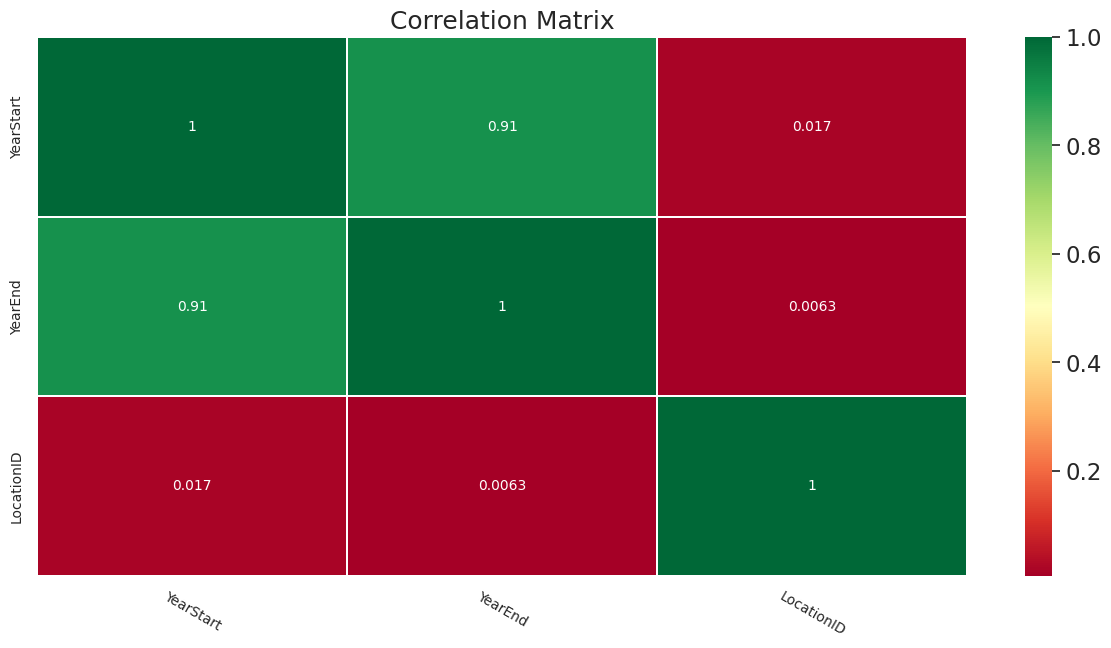

In [48]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

pada gambar heatmap diatas dapat diketahui kolom dengan korelasi paling buruk terdapat pada kolom locationID dengan nilai 0.0063 dan YearEnd dengan nilai 0.0063.

**4. Splitting Dataset**

Splitting Dataset atau pemisahan data digunakan untuk mengevaluasi atau uji data dan digunakan untuk melatih model

**4.1 Slicing**

digunakan untuk menetukan label dan data inputan yang akan digunakan, disini saya menggunakan LocationAbbr sebagai label, jadi kolom selain label termasuk kedalam inputan.

We define x and y as x for data and y for label

In [49]:
x = dataset.drop('LocationAbbr', axis=1)
x

,YearStart,YearEnd,LocationDesc,DataSource,Topic,Question,DataValueType,StratificationCategory1,Stratification1,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2014,2014,Arkansas,SEDD; SID,Asthma,Hospitalizations for asthma,Number,Gender,Male,5,AST,AST3_1,NMBR,GENDER,GENM
1,2018,2018,Colorado,SEDD; SID,Asthma,Hospitalizations for asthma,Number,Overall,Overall,8,AST,AST3_1,NMBR,OVERALL,OVR
2,2018,2018,District of Columbia,SEDD; SID,Asthma,Hospitalizations for asthma,Number,Overall,Overall,11,AST,AST3_1,NMBR,OVERALL,OVR
3,2017,2017,Georgia,SEDD; SID,Asthma,Hospitalizations for asthma,Number,Gender,Female,13,AST,AST3_1,NMBR,GENDER,GENF
4,2010,2010,Michigan,SEDD; SID,Asthma,Hospitalizations for asthma,Number,Race/Ethnicity,Hispanic,26,AST,AST3_1,NMBR,RACE,HIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185671,2020,2020,Wyoming,BRFSS,Diabetes,Dilated eye examination among adults aged >= 1...,Age-adjusted Prevalence,Race/Ethnicity,"White, non-Hispanic",56,DIA,DIA7_0,AGEADJPREV,RACE,WHT
1185672,2020,2020,Wyoming,BRFSS,Older Adults,Proportion of older adults aged >= 65 years wh...,Crude Prevalence,Race/Ethnicity,"White, non-Hispanic",56,OLD,OLD3_1,CRDPREV,RACE,WHT
1185673,2017,2017,Iowa,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,Age-adjusted Prevalence,Race/Ethnicity,Hispanic,19,ART,ART2_1,AGEADJPREV,RACE,HIS
1185674,2020,2020,Wyoming,BRFSS,Diabetes,Diabetes prevalence among women aged 18-44 years,Crude Prevalence,Race/Ethnicity,Hispanic,56,DIA,DIA2_2,CRDPREV,RACE,HIS


Choose feature Type as a label

In [50]:
y = dataset["LocationAbbr"]
y

0          AR
1          CO
2          DC
3          GA
4          MI
           ..
1185671    WY
1185672    WY
1185673    IA
1185674    WY
1185675    RI
Name: LocationAbbr, Length: 1185572, dtype: object

In [51]:
y.values.reshape(-1,1)

array([['AR'],
       ['CO'],
       ['DC'],
       ...,
       ['IA'],
       ['WY'],
       ['RI']], dtype=object)

**4.2 Categorical Encoding**
karena masih terdapat data yang tipenya string maka data tersebut perlu dirubah menjadi numerical. karena kebanyak mesin learning model tidak dapat menerima string. maka perlu dilakukan transforming Categorical Encoding. data yang dirubah hanya akan muncul antara 0 dan 1. jika data tersebut muncul akan dihitung menjadi 1 dan untuk data yang tidak muncul akan dihitung menjadi 0

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [52]:
x = pd.get_dummies(x)
x

,YearStart,YearEnd,LocationID,LocationDesc_Alabama,LocationDesc_Alaska,LocationDesc_Arizona,LocationDesc_Arkansas,LocationDesc_California,LocationDesc_Colorado,LocationDesc_Connecticut,...,StratificationID1_APIO,StratificationID1_ASN,StratificationID1_BLK,StratificationID1_GENF,StratificationID1_GENM,StratificationID1_HIS,StratificationID1_MRC,StratificationID1_OTH,StratificationID1_OVR,StratificationID1_WHT
0,2014,2014,5,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2018,2018,8,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,2018,2018,11,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2017,2017,13,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2010,2010,26,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185671,2020,2020,56,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1185672,2020,2020,56,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1185673,2017,2017,19,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1185674,2020,2020,56,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [53]:
x.shape

(1185572, 597)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)
std_scale

**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [ ]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,...,570,571,572,573,574,575,576,577,578,579
0,0.500000,0.500000,0.051948,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.785714,0.785714,0.090909,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.785714,0.785714,0.129870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.714286,0.714286,0.155844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.214286,0.214286,0.324675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185567,0.928571,0.928571,0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1185568,0.928571,0.928571,0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1185569,0.714286,0.714286,0.233766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1185570,0.928571,0.928571,0.714286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


4.3 Splitting


prosedur ini dilakukan untuk memperkirakan kinerja algoritme pembelajaran mesin saat digunakan untuk membuat prediksi pada data yang tidak digunakan untuk melatih model

Train test split digunakan untuk membagi data

In [ ]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
x,y = make_blobs(n_samples=1000)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=1, stratify=y)

In [ ]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({0: 224, 1: 223, 2: 223})
Test distribution Counter({0: 110, 1: 110, 2: 110})


This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [ ]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [ ]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.998507 (0.004478)


In [ ]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

LogisticRegression()

In [ ]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

1.0


In [ ]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00       110

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330

